# Feature Selection
1. Numerical column vs Target => Corelation (pearson-coefficient)
2. Category column vs Target => Box plots

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv"
df = pd.read_csv(url,index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Fixing Missing Values

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer

df.replace('?', np.nan, inplace=True)
# numerical columns
num_cols_to_fix  = ['normalized-losses','bore','stroke','horsepower','peak-rpm']
# categorical columns
cat_cols_to_fix = ['num-of-doors']

ni = SimpleImputer()
ci = SimpleImputer(strategy='most_frequent')
df[num_cols_to_fix] = ni.fit_transform(df[num_cols_to_fix])
df[cat_cols_to_fix] = ci.fit_transform(df[cat_cols_to_fix])
df.dropna(inplace=True)
df.price = df.price.astype(int)
df.shape

(201, 26)

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


Correlation Rules

- values must be within [-1,1]
- values near 0 are not very important
- values that are near -1 or 1 are very important
- values near -1 are called negatively correlated
- values near 1 are called positively correlated
- you have to select a threshold to determine if a value is correlated or not ( default is 0.5 )

In [6]:
df.corr(method='spearman')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.483960,-0.542030,-0.404203,-0.260553,-0.529907,-0.260517,-0.181819,-0.180029,-0.015937,0.020986,-0.004021,0.290138,-0.021918,0.050444,-0.142683
normalized-losses,0.483960,1.000000,-0.072600,0.045926,0.117695,-0.345880,0.123187,0.124089,-0.022405,0.099416,-0.067848,0.236603,0.241301,-0.258637,-0.209499,0.202034
wheel-base,-0.542030,-0.072600,1.000000,0.913120,0.815524,0.641402,0.764638,0.645661,0.537537,0.221315,-0.119545,0.495114,-0.316128,-0.484472,-0.531121,0.681790
length,-0.404203,0.045926,0.913120,1.000000,0.889761,0.532213,0.889759,0.779691,0.639575,0.178648,-0.180277,0.660012,-0.271673,-0.661012,-0.688778,0.810331
width,-0.260553,0.117695,0.815524,0.889761,1.000000,0.370636,0.858624,0.762966,0.606621,0.236914,-0.138980,0.681364,-0.213543,-0.673376,-0.692498,0.812097
height,-0.529907,-0.345880,0.641402,0.532213,0.370636,1.000000,0.362877,0.208611,0.222777,-0.027400,0.008056,0.021625,-0.279633,-0.079883,-0.137731,0.263806
curb-weight,-0.260517,0.123187,0.764638,0.889759,0.858624,0.362877,1.000000,0.874364,0.702016,0.156648,-0.213276,0.804234,-0.247198,-0.805613,-0.830918,0.913767
engine-size,-0.181819,0.124089,0.645661,0.779691,0.762966,0.208611,0.874364,1.000000,0.697316,0.292150,-0.233197,0.818438,-0.282721,-0.722111,-0.716830,0.828417
bore,-0.180029,-0.022405,0.537537,0.639575,0.606621,0.222777,0.702016,0.697316,1.000000,-0.084074,-0.169436,0.640574,-0.305171,-0.607415,-0.619292,0.645943
stroke,-0.015937,0.099416,0.221315,0.178648,0.236914,-0.027400,0.156648,0.292150,-0.084074,1.000000,-0.055001,0.135682,-0.071172,-0.018086,-0.015152,0.112829


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Get all numerical columns
num_cols = df.select_dtypes(include=['int64','float64','int32']).columns.tolist()
# Get all th catagorical Columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Numerical Columns:/n',num_cols)
print('Catagorical Columns:/n',cat_cols)

Numerical Columns:/n ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
Catagorical Columns:/n ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [9]:
df.shape

(201, 26)

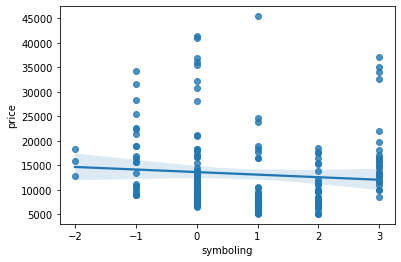

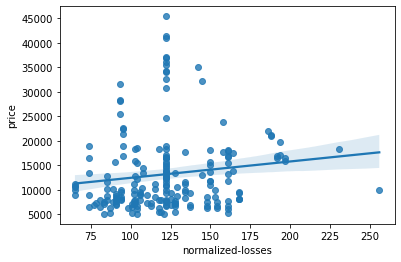

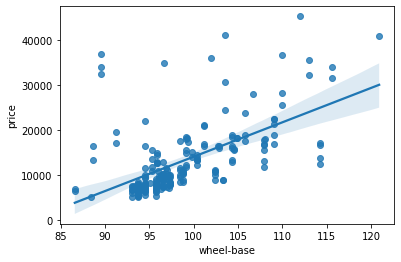

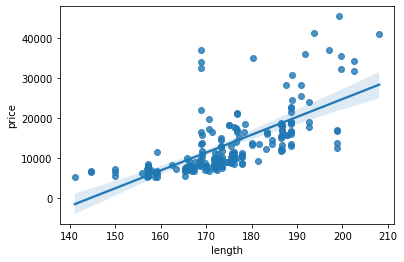

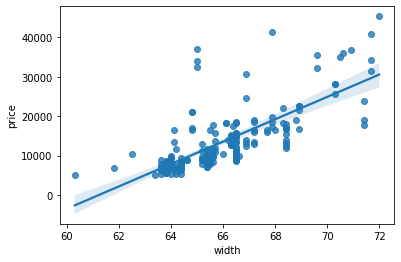

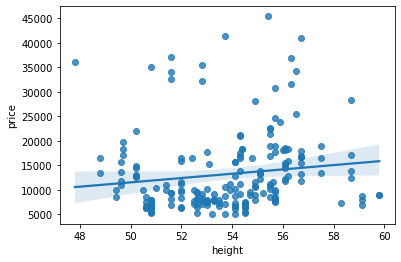

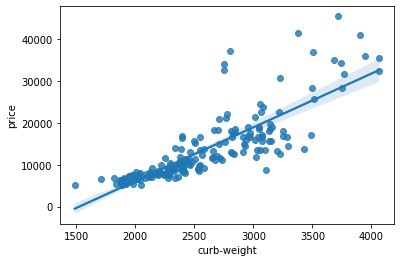

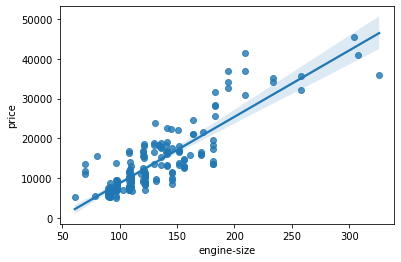

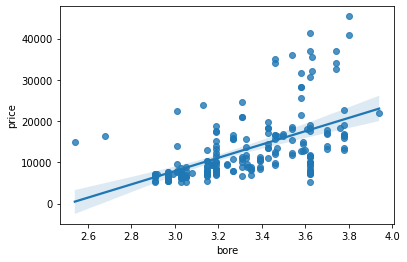

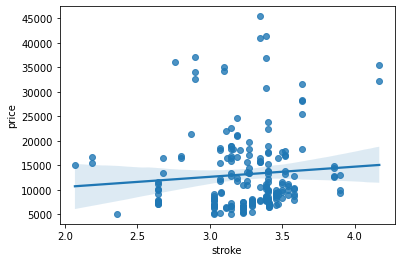

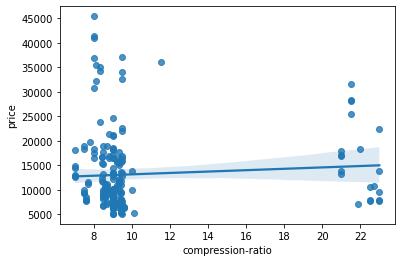

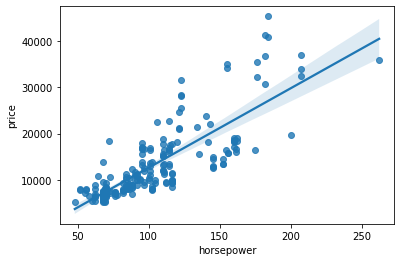

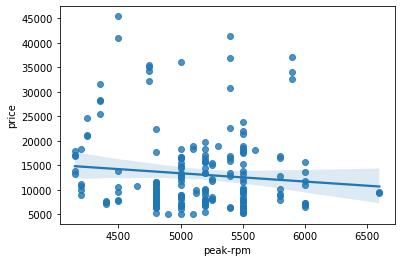

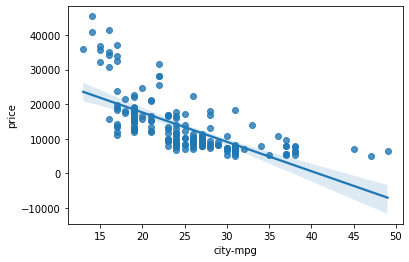

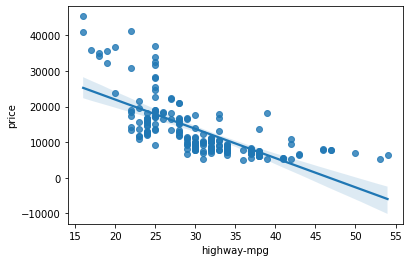

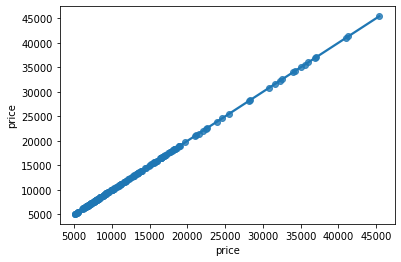

In [10]:

for col in num_cols:
    sns.regplot(x=col,y='price',data=df)
    plt.show()

In [11]:
nums_cols_to_use = [
    'horsepower',
    'wheel-base',
    'length',
    'width',
    'curb-weight',
    'engine-size',
    'bore',
    'horsepower',
    'city-mpg', 
    'highway-mpg',
]

Box plot correlation for categorical Variables

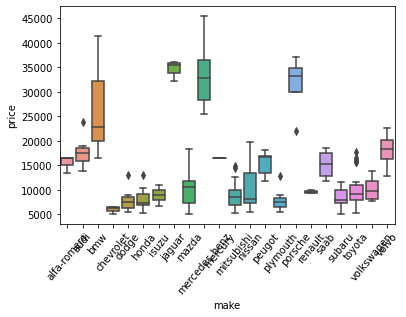

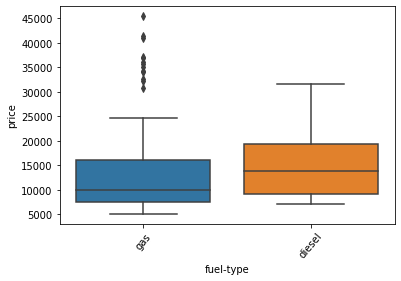

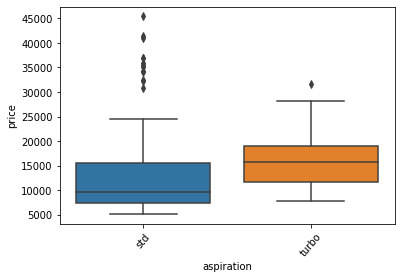

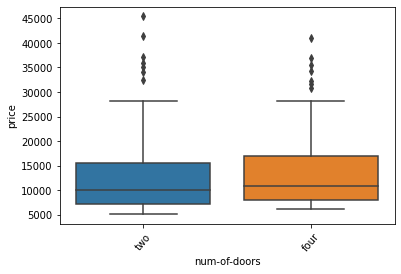

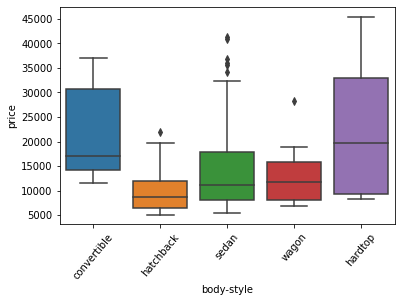

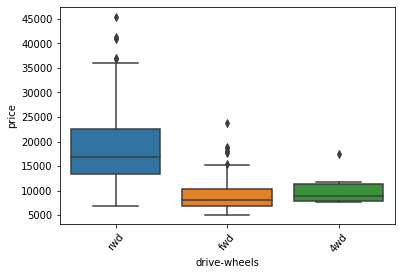

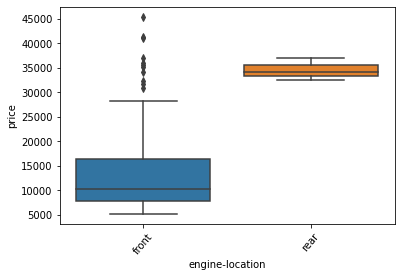

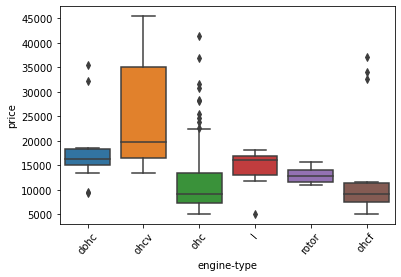

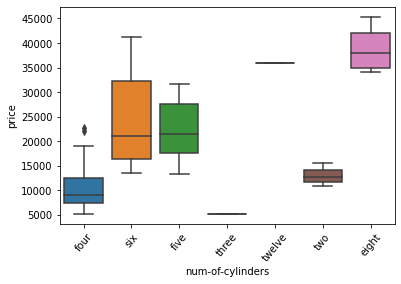

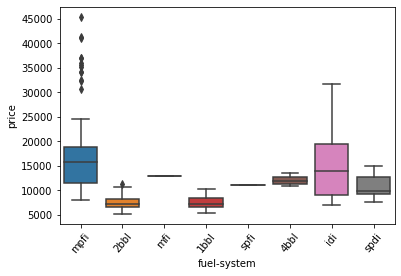

In [12]:
for col in cat_cols:
    sns.boxplot(x=col, y='price',data=df)
    plt.xticks(rotation=50)
    plt.show()

## Features Selection using Algorithms from Sklearn

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [14]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = df.drop('Outcome',axis=1)
y= df['Outcome']

In [16]:
featSelector = SelectKBest(score_func=chi2,k=5)
featSelector.fit(X,y)

SelectKBest(k=5, score_func=<function chi2 at 0x000002DBAD1CE9D0>)

In [17]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
print("Scores for each feature:")
for colname,score in zip(X.columns.tolist(),featSelector.scores_):
    print(f"{colname.ljust(25)} {score: .3f}")

Scores for each feature:
Pregnancies                111.520
Glucose                    1411.887
BloodPressure              17.605
SkinThickness              53.108
Insulin                    2175.565
BMI                        127.669
DiabetesPedigreeFunction   5.393
Age                        181.304


In [19]:
print(featSelector.get_feature_names_out())

['Pregnancies' 'Glucose' 'Insulin' 'BMI' 'Age']


In [20]:
selected_cols = featSelector.get_feature_names_out().tolist()
X_selected_5 = X[selected_cols]
X_selected_5

,Pregnancies,Glucose,Insulin,BMI,Age
0,6,148,0,33.6,50
1,1,85,0,26.6,31
2,8,183,0,23.3,32
3,1,89,94,28.1,21
4,0,137,168,43.1,33
...,...,...,...,...,...
763,10,101,180,32.9,63
764,2,122,0,36.8,27
765,5,121,112,26.2,30
766,1,126,0,30.1,47


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_5)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_selected_5,y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("accuracy_score")
print(accuracy_score(ytest,y_pred))
print("confusion_matrix")
print(confusion_matrix(ytest, y_pred))
print("classificationb_report")
print(classification_report(ytest, y_pred))

accuracy_score
0.6493506493506493
confusion_matrix
[[70 29]
 [25 30]]
classificationb_report
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        99
           1       0.51      0.55      0.53        55

    accuracy                           0.65       154
   macro avg       0.62      0.63      0.62       154
weighted avg       0.66      0.65      0.65       154



In [23]:
from sklearn.feature_selection import RFE

In [24]:
clf = DecisionTreeClassifier()
rfe = RFE(clf, n_features_to_select = 5)
rfe.fit(X, y)
print(rfe.get_feature_names_out().tolist())

['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [25]:
scaler = StandardScaler()
X_selected_5 = X[rfe.get_feature_names_out().tolist()]
X_scaled = scaler.fit_transform(X_selected_5)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_selected_5,y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("accuracy_score")
print(accuracy_score(ytest,y_pred))
print("confusion_matrix")
print(confusion_matrix(ytest, y_pred))
print("classificationb_report")
print(classification_report(ytest, y_pred))

accuracy_score
0.7467532467532467
confusion_matrix
[[79 20]
 [19 36]]
classificationb_report
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [26]:
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
clf2 = ExtraTreesClassifier(n_estimators=100)
clf2.fit(X, y)

print("Scores for each feature:")
for colname,score in zip(X.columns.tolist(),clf2.feature_importances_):
    print(f"{colname.ljust(25)}: {score: .5f}")

Scores for each feature:
Pregnancies              :  0.11011
Glucose                  :  0.22547
BloodPressure            :  0.10295
SkinThickness            :  0.08032
Insulin                  :  0.07191
BMI                      :  0.14587
DiabetesPedigreeFunction :  0.12103
Age                      :  0.14234


<AxesSubplot:xlabel='colnames'>

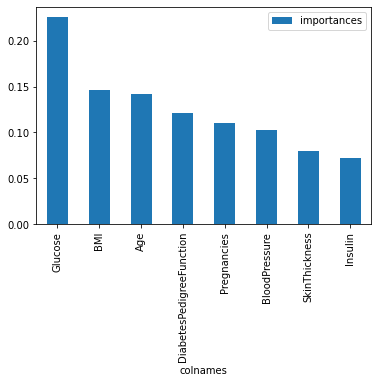

In [28]:
data = {
    'colnames': X.columns.tolist(),
    'importances': clf2.feature_importances_.tolist()
}
pd.DataFrame(data).sort_values(by='importances', ascending=False).plot(kind='bar', x='colnames', y='importances')

In [29]:
scaler = StandardScaler()
X_selected = X[['Glucose','Age','BMI']]
X_scaled = scaler.fit_transform(X_selected)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print("accuracy_score")
print(accuracy_score(ytest, y_pred))
print("confusion_matrix")
print(confusion_matrix(ytest, y_pred))
print("classification_report")
print(classification_report(ytest, y_pred))

accuracy_score
0.6883116883116883
confusion_matrix
[[71 28]
 [20 35]]
classification_report
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        99
           1       0.56      0.64      0.59        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.69      0.69       154

